<a href="https://colab.research.google.com/github/VladislavTokarev02/AI_ML_homework/blob/main/ai24-toxicity-prediction%20/notebooks/Vlad_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import impute
from sklearn import preprocessing
import numpy as np
import warnings
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split


In [2]:
import gc

gc.collect()  #сборка мусора

9

In [3]:
df = pd.read_csv('/content/resultwithfeatures.csv', low_memory = False)

In [4]:
random.seed(42)
np.random.seed(42)

In [5]:
df.head(3)

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,300.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(114757, 1422)

In [7]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,LD50,Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),Eye_Corrosion,Eye_Corrosion (a.u.),Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
count,9.921700e+04,1099.000000,0.0,3346.000000,0.0,2627.000000,0.0,5577.000000,0.0,7836.000000,...,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000,114757.000000
mean,1.627611e+03,0.481347,NaN,0.510460,NaN,0.347164,NaN,0.708087,NaN,0.548111,...,0.025367,0.012731,0.006326,0.094068,0.013489,0.277595,0.023380,0.016522,0.017881,0.008287
std,2.196844e+04,0.499879,NaN,0.499965,NaN,0.476159,NaN,0.454683,NaN,0.497712,...,0.157237,0.112113,0.079287,0.291925,0.115358,0.447815,0.151107,0.127472,0.132520,0.090656
min,0.000000e+00,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+02,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000e+02,0.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000033e+03,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.500000e+06,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns[:25]

Index(['Source', 'Smiles', 'Exp. Animal', 'Method of administration', 'LD50',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)', 'MaxAbsEStateIndex', 'MaxEStateIndex',
       'MinAbsEStateIndex'],
      dtype='object')

In [9]:
df = df.drop_duplicates(subset = ['Smiles', 'Exp. Animal', 'Method of administration'])
df.shape

(114033, 1422)

In [10]:
df.memory_usage(deep=True).sum() / 1024

1310574.7802734375

In [11]:
cat_features_mask = (df.dtypes == "object").values

obj_cols = df.select_dtypes('object').columns
df[obj_cols] = df[obj_cols].astype('category')

In [12]:
df.memory_usage(deep=True).sum() / 1024

1273943.888671875

In [13]:
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')

In [14]:
df.memory_usage(deep=True).sum() / 1024

249985.4560546875

In [15]:
df = df.drop_duplicates(subset = ['Smiles', 'Exp. Animal', 'Method of administration'])
df.shape

(114033, 1422)

In [16]:
df[:25].columns

Index(['Source', 'Smiles', 'Exp. Animal', 'Method of administration', 'LD50',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)',
       ...
       'MorganFP_1015', 'MorganFP_1016', 'MorganFP_1017', 'MorganFP_1018',
       'MorganFP_1019', 'MorganFP_1020', 'MorganFP_1021', 'MorganFP_1022',
       'MorganFP_1023', 'MorganFP_1024'],
      dtype='object', length=1422)

In [17]:
df = df.drop(['Source', 'Smiles',
       'LD50 (a.u.)', 'Carcinogenicity', 'Carcinogenicity (a.u.)',
       'Hepatoxicity', 'Hepatoxicity (a.u.)', 'Eye_Corrosion',
       'Eye_Corrosion (a.u.)', 'Eye_Irritation', 'Eye_Irritation (a.u.)',
       'Mutagenicity', 'Mutagenicity (a.u.)', 'Respiratory_Toxicity',
       'Respiratory_Toxicity (a.u.)', 'LC50', 'LC50 (a.u.)', 'NOAEL',
       'NOAEL (a.u)'], axis = 1).reset_index(drop = True)
df.shape

(114033, 1403)

In [18]:
df.columns
df.shape

(114033, 1403)

In [19]:
df = df.dropna(subset=['LD50'])
df.shape

(98512, 1403)

In [20]:
Q10 = df['LD50'].quantile(0.10)
Q90 = df['LD50'].quantile(0.90)
IQR = Q90 - Q10

lower_bound = Q10 - 1.5 * IQR
upper_bound = Q90 + 1.5 * IQR

df = df[(df['LD50'] >= lower_bound) & (df['LD50'] <= upper_bound)]
df = df[df['LD50'] != 0]
df.shape

(95591, 1403)

In [21]:
threshold = 0.996  # Порог в 99.6%
#удаляем столбцы, где 99.6% значений — это одно уникальное значение
def drop_constant_columns(df, threshold):
    to_drop = []  # Список столбцов для удаления
    for col in df.columns:
        # Рассчитываем долю самого частого значения
        max_freq = df[col].value_counts(normalize=True).max()
        if max_freq >= threshold:
            to_drop.append(col)
    # Удаляем столбцы
    return df.drop(columns=to_drop)

# Применяем функцию
df_cleaned = drop_constant_columns(df, threshold)


In [22]:
df_cleaned.shape

(95591, 1382)

In [23]:
df = df_cleaned

In [24]:
df = df.dropna()
df.shape

(92494, 1382)

In [25]:
df['log_LD50'] = np.log(df['LD50'])

<ipython-input-25-8306555011e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_LD50'] = np.log(df['LD50'])


<Axes: >

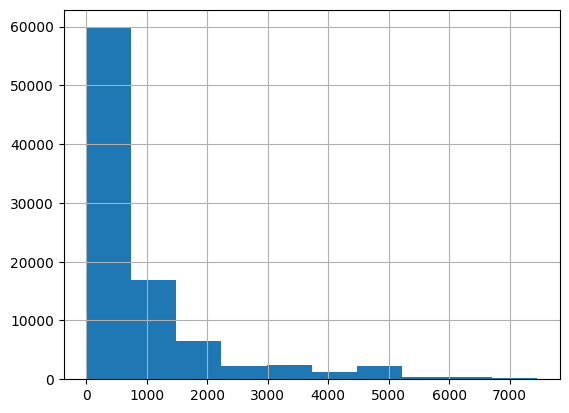

In [26]:
df['LD50'].hist()

<Axes: >

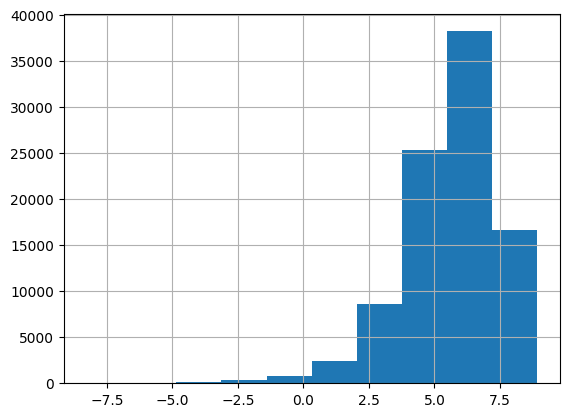

In [27]:
df['log_LD50'].hist()

In [28]:
X = df.drop(columns=['LD50', 'log_LD50'])
y = df['log_LD50']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=123)

In [29]:
num_col = X.select_dtypes(include=['number']).columns.tolist()
cat_col = X.select_dtypes(include=['category']).columns.tolist()

X_train_cat = X_train[cat_col]
X_train_num = X_train[num_col]

X_test_cat = X_test[cat_col]
X_test_num = X_test[num_col]

In [30]:
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop = 'first')  # handle_unknown='ignore' для новых категорий в тесте


X_train_encoded = OHE.fit_transform(X_train_cat)
X_test_encoded = OHE.transform(X_test_cat)


ohe_columns = OHE.get_feature_names_out(cat_col)
X_train_cat = pd.DataFrame(X_train_encoded, columns=ohe_columns, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_encoded, columns=ohe_columns, index=X_test.index)

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col, index=X_test.index)

In [32]:
X_train = pd.concat([X_train_cat, X_train_scaled], axis=1)
X_test = pd.concat([X_test_cat, X_test_scaled], axis=1)

In [33]:
X_train.head(3)

,Exp. Animal_rat,Method of administration_gavage,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
101869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
83272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39768,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"r2 на трейне ={r2_score(np.exp(y_train), np.exp(lr.predict(X_train)))}")
print(f"r2 на тесте ={r2_score(np.exp(y_test), np.exp(y_pred))}")

print(f"MAPE на трейне ={mean_absolute_percentage_error(np.exp(y_train), np.exp(lr.predict(X_train)))}")
print(f"MAPE на тесте ={mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))}")

r2 на трейне =0.12721329549762195
r2 на тесте =0.10428218306476089
MAPE на трейне =16.298627464461433
MAPE на тесте =30.045583857530566


In [35]:
print(lr.intercept_)
print(lr.coef_)

-914.7859214652798
[-0.00526064 -0.7716004  -0.43272621 ...  0.02107334 -0.08517563
 -0.08531189]


In [36]:
series_with_coefs = pd.Series(lr.coef_, index = X_train.columns, name = 'weights').sort_values(ascending = False).head(10)
series_with_coefs

,weights
MaxAbsEStateIndex,4.925143e+11
NumAromaticHeterocycles,9.019980e+10
fr_COO,7.519897e+10
NumAromaticCarbocycles,7.328733e+10
NumAliphaticHeterocycles,6.450429e+10
NumAliphaticCarbocycles,3.993123e+10
GROUPIA(ALKALIMETAL),1.795658e+10
fr_Ar_NH,1.679522e+10
"GROUPIVA,VA,VIAPERIODS45447(Ge...)",7.979061e+09
NumSaturatedRings,7.552297e+09


Исходя из различий метрик практически в 2 раза, что на трейне, что на тесте можно сказать, что модель переобучилась.

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # 95% объяснённой дисперсии

# Подгоняем PCA на тренировочных данных и трансформируем их
X_train_pca = pca.fit_transform(X_train)

# Трансформируем тестовые данные с помощью уже подогнанного PCA
X_test_pca = pca.transform(X_test)

# Проверяем, как изменилась размерность данных
print("Размерность после PCA:")
print(f"X_train_pca: {X_train_pca.shape}, X_test_pca: {X_test_pca.shape}")

Размерность после PCA:
X_train_pca: (69370, 792), X_test_pca: (23124, 792)


In [38]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred = lr_pca.predict(X_test_pca)
score = r2_score(y_test, y_pred)
print(f"r2 на трейне ={r2_score(np.exp(y_train), np.exp(lr_pca.predict(X_train_pca)))}")
print(f"r2 на тесте ={r2_score(np.exp(y_test), np.exp(y_pred))}")

print(f"MAPE на трейне ={mean_absolute_percentage_error(np.exp(y_train), np.exp(lr_pca.predict(X_train_pca)))}")
print(f"MAPE на тесте ={mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))}")

r2 на трейне =0.1341350053886754
r2 на тесте =0.11704943255427103
MAPE на трейне =22.409831415161744
MAPE на тесте =41.56230719239008


Доли объяснённой дисперсии каждой компоненты:
[0.06001025 0.04766499 0.04088874 0.02869921 0.02393538 0.02247206
 0.01927585 0.01679345 0.01643308 0.01507131 0.01370249 0.01286122
 0.01076501 0.01030514 0.00955238 0.00908174 0.0084688  0.00824832
 0.00784887 0.00732219 0.00686393 0.00683869 0.00666452 0.00625898
 0.00599398 0.00593605 0.00564794 0.00562205 0.00542408 0.00524203
 0.00499431 0.00487484 0.00479054 0.00465664 0.00448783 0.00433847
 0.00427767 0.00416118 0.00400328 0.00398042 0.00384052 0.00370066
 0.00352728 0.00346777 0.00341418 0.00334703 0.00323437 0.00322324
 0.00320085 0.00313983 0.0030594  0.00302645 0.00298831 0.00292121
 0.00287666 0.00285438 0.00277442 0.00273766 0.00271627 0.00265526
 0.00264929 0.00259585 0.00252854 0.00250339 0.00245548 0.00240763
 0.00239775 0.00231227 0.0023069  0.00227151 0.00223976 0.00220587
 0.00218503 0.00215664 0.0021246  0.00208532 0.00207275 0.00203601
 0.00202392 0.00196176 0.00195806 0.0019325  0.00191968 0.00189818
 0.00187495 0.00

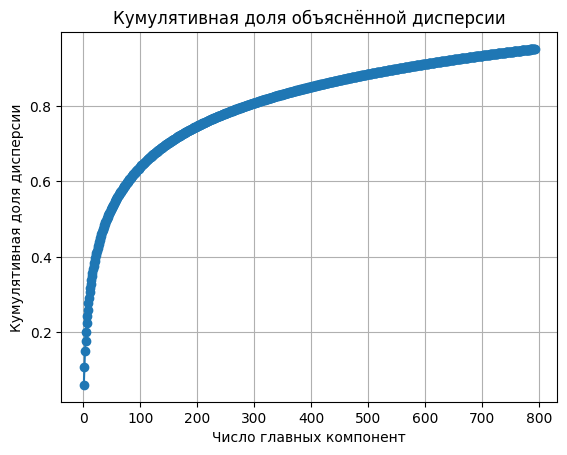

In [39]:
print("Доли объяснённой дисперсии каждой компоненты:")
print(pca.explained_variance_ratio_)

# Кумулятивная доля дисперсии
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Кумулятивная доля объяснённой дисперсии')
plt.xlabel('Число главных компонент')
plt.ylabel('Кумулятивная доля дисперсии')
plt.grid()
plt.show()

In [40]:
#переводим в датафрейм
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# lr_pca.coef_ должен быть массивом с коэффициентами линейной регрессии
coefs_pca = pd.Series(lr_pca.coef_, index=X_train_pca_df.columns, name='weights').sort_values(ascending=False)
coefs_pca.head(10)

,weights
PC604,0.450778
PC528,0.414968
PC134,0.414584
PC40,0.410443
PC372,0.409956
PC32,0.386873
PC737,0.385967
PC44,0.371869
PC359,0.369749
PC113,0.366769


Видим, что коэффициенты модели уменьшились. Наш датасет с признаками представляет собой разреженную матрицу, можно попробовать адаптировать PCA как раз для модели разреженных данных.

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD

# Применение SVD
svd = TruncatedSVD(n_components=600, random_state=42)  # Сохраняем 500 главных компонент
X_train_pca_upgrade = svd.fit_transform(X_train)          # Применяем SVD на тренировочные данные
X_test_pca_upgrade = svd.transform(X_test)                # Применяем SVD на тестовые данные

print(f"Размер X_train до SVD: {X_train.shape}")
print(f"Размер X_train после SVD: {X_train_pca_upgrade.shape}")
print(f"Размер X_test после SVD: {X_test_pca_upgrade.shape}")

# === Обучение линейной регрессии на данных уменьшенной размерности ===
lr_pca_upgrade = LinearRegression()
lr_pca_upgrade.fit(X_train_pca_upgrade, y_train)

# === Оценка модели ===
y_train_preds = lr_pca_upgrade.predict(X_train_pca_upgrade)  # Предсказания для тренировки
y_test_preds = lr_pca_upgrade.predict(X_test_pca_upgrade)    # Предсказания для теста

print(f"R2 на трейне = {r2_score(np.exp(y_train), np.exp(y_train_preds)):.4f}")
print(f"R2 на тесте = {r2_score(np.exp(y_test), np.exp(y_test_preds)):.4f}")

print(f"MAPE на трейне = {mean_absolute_percentage_error(np.exp(y_train), np.exp(y_train_preds)):.4f}")
print(f"MAPE на тесте = {mean_absolute_percentage_error(np.exp(y_test), np.exp(y_test_preds)):.4f}")

Размер X_train до SVD: (69370, 1391)
Размер X_train после SVD: (69370, 600)
Размер X_test после SVD: (23124, 600)
R2 на трейне = 0.1266
R2 на тесте = 0.1085
MAPE на трейне = 26.2026
MAPE на тесте = 51.1306


In [42]:
print(f"Доля объясненной дисперсии: {svd.explained_variance_ratio_.sum() * 100:.2f}%")

Доля объясненной дисперсии: 90.87%


In [43]:
selector = SelectKBest(score_func=f_regression, k=500)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Проверить значимость признаков
selected_features = selector.get_support(indices=True)
#print("Выбранные признаки:", selected_features)


lr_kbest = LinearRegression()
lr_kbest.fit(X_train_selected, y_train)

# Предсказания и оценка
y_pred = lr_kbest.predict(X_test_selected)


print(f"R2 на трейне = {r2_score(y_train, lr_kbest.predict(X_train_selected)):.4f}")
print(f"R2 на тесте = {r2_score(y_test, lr_kbest.predict(X_test_selected)):.4f}")

print(f"MAPE на трейне = {mean_absolute_percentage_error(np.exp(y_train), np.exp(lr_kbest.predict(X_train_selected))):.4f}")
print(f"MAPE на тесте = {mean_absolute_percentage_error(np.exp(y_test), np.exp(lr_kbest.predict(X_test_selected))):.4f}")

R2 на трейне = 0.4436
R2 на тесте = 0.4240
MAPE на трейне = 27.2351
MAPE на тесте = 43.0379


In [44]:
X_train.head()

,Exp. Animal_rat,Method of administration_gavage,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
101869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
83272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39768,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
51273,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
63780,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
!pip install tqdm

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1e-4, 1e-3, 1e-2]}
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, scoring='neg_mean_absolute_error', cv=4, verbose = 1)
grid_search.fit(X_train_pca, y_train)
print("Лучший параметр alpha:", grid_search.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Лучший параметр alpha: {'alpha': 0.001}


In [51]:
grid_search.best_score_

-1.015910764275217